In [4]:
# !pip install opencv-python

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pprint import pprint
from statistics import median,mode

In [6]:
img_3 = mpimg.imread('sp.tif')

In [7]:
def salt_pepper(img3,m,n):
  img_temp = img3
  img21 = [[0 for c in range(n)] for r in range(m)]
  img21 = np.array(img21)
  j = 0
  while j <= 10:
    for i in range(1,m-1):
      for j in range(1,n-1):
        if img3[i,j] == 0 or img3[i,j] == 255:
          if i in range (0,1) and j in range(1,n-1):
              img21[i][j] = (img3[i][j-1]+img3[i][j+1]+img3[i+1][j-1]+img3[i+1][j]+img3[i+1][j+1])/5
          elif i in range (m-1,m) and j in range(1,n-1):
              img21[i][j] = (img3[i-1][j-1]+img3[i-1][j]+img3[i-1][j+1]+img3[i][j-1]+img3[i][j+1])/5
          elif i in range (1,m-1)and j in range(0,1):
              img21[i][j] = (img3[i-1][j]+img3[i-1][j+1]+img3[i][j+1]+img3[i+1][j]+img3[i+1][j+1])/5
          elif i in range (1,m-1) and j in range(n-1,n):
              img21[i][j] = (img3[i-1][j-1]+img3[i-1][j]+img3[i][j-1]+img3[i+1][j-1]+img3[i+1][j])/5
          elif i == 0 and j == 0:
            img21[i][j] = (img3[i][j+1]+img3[i+1][j]+img3[i+1][j+1])/3
          elif i == 0 and j == n-1:
            img21[i][j] = (img3[i][j-1]+img3[i+1][j-1]+img3[i+1][j])/3
          elif i == m-1 and j == 0:
            img21[i][j] = (img3[i-1][j]+img3[i-1][j+1]+img3[i][j+1])/3
          elif i == m-1 and j == n-1:
            img21[i][j] = (img3[i-1][j-1]+img3[i-1][j]+img3[i][j-1])/3
          else:
            img21[i][j] = (img3[i-1][j-1]+img3[i-1][j]+img3[i-1][j+1]+img3[i][j-1]+img3[i][j+1]+img3[i+1][j-1]+img3[i+1][j]+img3[i+1][j+1])/8
        else:
          img21[i][j] = img3[i][j]
    img3 = img21
    j+=1

  plt.figure(figsize=[15,6])
  plt.subplot(1,2,1)
  plt.imshow(img_temp,cmap="gray")
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(img21,cmap="gray")
  plt.axis('off')
  plt.show()
  return img21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in ubyte_scalars


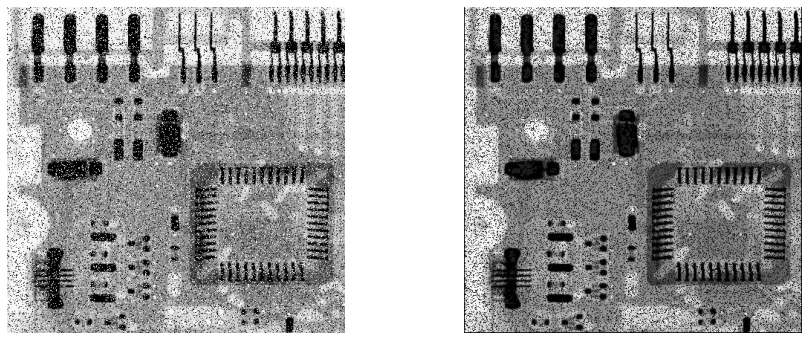

In [8]:
m2,n2 = img_3.shape
img31 = salt_pepper(img_3,m2,n2)

In [9]:
def salt_pepper_median(img3,m,n):
  img_temp = img3
  img21 = [[0 for c in range(n)] for r in range(m)]
  img21 = np.array(img21)
  j = 0
  while j <= 10:
    for i in range(1,m-1):
      for j in range(1,n-1):
        if img3[i,j] in range(0,15) or img3[i,j] == 255:
          if i in range (0,1) and j in range(1,n-1):
              img21[i][j] = median((img3[i][j-1],img3[i][j+1],img3[i+1][j-1],img3[i+1][j],img3[i+1][j+1]))
          elif i in range (m-1,m) and j in range(1,n-1):
              img21[i][j] = median((img3[i-1][j-1],img3[i-1][j],img3[i-1][j+1],img3[i][j-1],img3[i][j+1]))
          elif i in range (1,m-1)and j in range(0,1):
              img21[i][j] = median((img3[i-1][j],img3[i-1][j+1],img3[i][j+1],img3[i+1][j],img3[i+1][j+1]))
          elif i in range (1,m-1) and j in range(n-1,n):
              img21[i][j] = median((img3[i-1][j-1],img3[i-1][j],img3[i][j-1],img3[i+1][j-1],img3[i+1][j]))
          elif i == 0 and j == 0:
            img21[i][j] = median((img3[i][j+1],img3[i+1][j],img3[i+1][j+1]))
          elif i == 0 and j == n-1:
            img21[i][j] = median((img3[i][j-1],img3[i+1][j-1],img3[i+1][j]))
          elif i == m-1 and j == 0:
            img21[i][j] = median((img3[i-1][j],img3[i-1][j+1],img3[i][j+1]))
          elif i == m-1 and j == n-1:
            img21[i][j] = median((img3[i-1][j-1],img3[i-1][j],img3[i][j-1]))
          else:
            img21[i][j] = median((img3[i-1][j-1],img3[i-1][j],img3[i-1][j+1],img3[i][j-1],img3[i][j+1],img3[i+1][j-1],img3[i+1][j],img3[i+1][j+1]))
        else:
          img21[i][j] = img3[i][j]
    img3 = img21
    j+=1

  plt.figure(figsize=[15,6])
  plt.subplot(1,2,1)
  plt.imshow(img_temp,cmap="gray")
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(img21,cmap="gray")
  plt.axis('off')
  plt.show()
  return img21

/usr/lib/python3.7/statistics.py:384: RuntimeWarning: overflow encountered in ubyte_scalars
  return (data[i - 1] + data[i])/2


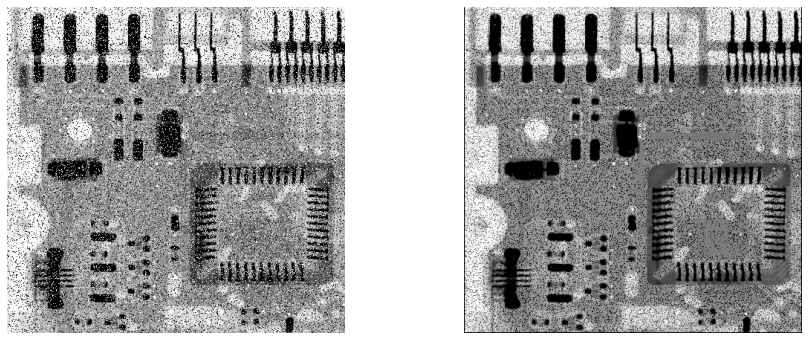

In [10]:
img4 = salt_pepper_median(img_3,m2,n2)